In [5]:
# Install Python package to use
!pip install tweepy
!pip install pandas
!pip install jsons
!pip install pymongo
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable

You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.



Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
# Import library
import tweepy
import pandas as pd
import json
from pymongo import MongoClient
import requests
import io
import matplotlib.pyplot as plt
import numpy as np
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# Display output of plotting on commands and display with retina resolution
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [7]:
# Variables that contains the user credentials to access Twitter API 
ACCESS_TOKEN = '2478383065-BW9aSXqLtjU0rWJ11sYeyD4odQ0qTWwTxGVWOmc'
ACCESS_SECRET = 'eJAXMtHwi71VGd1gwqLcSlms2hCs0tGami39009ANDDLA'
CONSUMER_KEY = 'iAQC0VHahIS6EIPSQtE4Uzy5s'
CONSUMER_SECRET = 'qYi4clJG3OdXptnBKubFVJIpT2uTjm7RcZChcbC3MEHWTMDK3G'

In [8]:
# Setup tweepy to authenticate with Twitter credentials:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

# Create the api to connect to twitter with your creadentials
api = tweepy.API(auth)

In [9]:
# Define array to store tweet data
tweets_list = []
print(tweets_list)

[]


In [10]:
# Read file from search 
with open('input.txt') as f:
    word = f.read()
    print(word)

#sunscreen


In [11]:
term = word

In [12]:
term

'#sunscreen'

In [13]:
#---------------------------------------------------------------------------------------------------------------------
# The following loop will print most recent statuses, including retweets, posted by the authenticating user and that user’s friends. 
# This is the equivalent of /timeline/home on the Web.
#---------------------------------------------------------------------------------------------------------------------
term = word
search_term = term + "-filter:retweets"

for status in tweepy.Cursor(api.search_tweets, q = search_term, lang = "en", tweet_mode= "extended").items(200):
	print(status._json)
	tweet_dict = { 'username': status.user.screen_name,
                   'full_text': status.full_text,
                   'created_at': str(status.created_at)
                 }
	tweets_list.append(tweet_dict)

#print(tweets_list)
#---------------------------------------------------------------------------------------------------------------------
# Twitter API development use pagination for Iterating through timelines, user lists, direct messages, etc. 
# To help make pagination easier and Tweepy has the Cursor object.
#---------------------------------------------------------------------------------------------------------------------

{'created_at': 'Wed Dec 15 11:42:21 +0000 2021', 'id': 1471083200751411201, 'id_str': '1471083200751411201', 'full_text': 'Do I need to wear sunscreen when I’m indoors?\n#sunscreen #Sunny #skincare #skincareroutine #Skinsista', 'truncated': False, 'display_text_range': [0, 101], 'entities': {'hashtags': [{'text': 'sunscreen', 'indices': [46, 56]}, {'text': 'Sunny', 'indices': [57, 63]}, {'text': 'skincare', 'indices': [64, 73]}, {'text': 'skincareroutine', 'indices': [74, 90]}, {'text': 'Skinsista', 'indices': [91, 101]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1461577334968885251, 'id_str': '1461577334968885251', 'name': 'Arjun Krishna', 'screen_name': '

In [14]:
tweets_list

[{'username': 'Arjunkishan15',
  'full_text': 'Do I need to wear sunscreen when I’m indoors?\n#sunscreen #Sunny #skincare #skincareroutine #Skinsista',
  'created_at': '2021-12-15 11:42:21+00:00'},
 {'username': 'Kroota_Co',
  'full_text': 'Kroota Day Cream !\n\n#kroota\n#kroota.co\n#daycream \n#sunscreen https://t.co/scUfK3w4xu',
  'created_at': '2021-12-15 10:20:04+00:00'},
 {'username': 'spooooonerisms',
  'full_text': 'A #sunscreen is important even in #winter . #Cetaphil has a Sun Kids sunscreen that uses liposomes to deliver the ingredients. It contains #aloevera , vitamin E and Panthenol . I contacted Galderma and found the PPD value of the sunscreen to be 14.5 (which is very good) https://t.co/5RmGkavfKv',
  'created_at': '2021-12-15 09:30:57+00:00'},
 {'username': 'ais_solvence',
  'full_text': "I swear by this sunscreen for my face! I've been using this for many years. Give it a try &amp; this could be on your HG list, too. 🙌 Don't forget to use the code: AISC8311 upon checko

In [15]:
len(tweets_list)

157

In [16]:
# Calling DataFrame constructor on list
df = pd.DataFrame(tweets_list)
df

,username,full_text,created_at
0,Arjunkishan15,Do I need to wear sunscreen when I’m indoors?\...,2021-12-15 11:42:21+00:00
1,Kroota_Co,Kroota Day Cream !\n\n#kroota\n#kroota.co\n#da...,2021-12-15 10:20:04+00:00
2,spooooonerisms,A #sunscreen is important even in #winter . #C...,2021-12-15 09:30:57+00:00
3,ais_solvence,I swear by this sunscreen for my face! I've be...,2021-12-15 07:55:21+00:00
4,talker_news,Research finds these sunscreens do more damage...,2021-12-15 07:26:00+00:00
...,...,...,...
152,JustineOlson93,Review // @earthharborlife Eclipse Mineral Sun...,2021-12-07 05:08:30+00:00
153,brilliantskinph,Here's when you need sunscreen! 😉👇🏽\n\n☀️ Goin...,2021-12-07 03:40:00+00:00
154,bluebellHQ,"Always wear sunscreen, no matter your skin col...",2021-12-07 02:09:46+00:00
155,brilliantskinph,Did you put Sunscreen Gel-Cream today before g...,2021-12-07 01:44:59+00:00


In [17]:
# Making Connection
myclient = MongoClient("mongodb://localhost:27017/")

# database
db = myclient["twitterdb"]

# Created or Switched to collection
# names: twiterdb
Collection = db["data"]

# Inserting data in the Collection
Collection.insert_many(tweets_list)

In [18]:
#Define array to store data from fetch mongodb
records_list = []

# Printing the data inserted
cursor = Collection.find().distinct('full_text')
for record in cursor:
    print(record)
    record_tweet = {'tweet':record}
    records_list.append(record_tweet)

"Everybody's free..."
https://t.co/9iXIJyavzf #Sunscreen
#After a chemical #peel, skin is temporarily more #sensitive to #sun, so wear #sunscreen every day
It should be "broad-spectrum", meaning it protects against the sun's #UVA and #UVB rays. Also, it should be a physical sunscreen and be above #SPF 30
https://t.co/Mk68Qs1RrO https://t.co/xngvMwl9fI
#December is #skincancerawarenessmonth &amp; we want you to know the facts! Read: https://t.co/C7PBf6tnJw
#cancerawareness #sunscreen #summerskincare #spreadthehope #spf100 #VitalabFertilityClinic #VitalabKZN #happyholidays #tistheseason #newyear2022 #oncologybuddies #filotimo https://t.co/07jtpvqEZ7
#DidYouKnow ⁉️

premature ageing is accelerated by sun exposure, which makes sunscreen the ultimate anti-ageing producct. 

#skinfunctional #spf #sunscreen #antiageing
#Poll: Do You Skip Sunscreen on Cloudy Days?

#Sunscreen
#QUIZ When should you apply sunscreen❓

Comment your answer down below!👇⁠
⁠
#WAKObeauty #skincareroutine #sunscreen #su

In [19]:
records_list

[{'tweet': '"Everybody\'s free..."\nhttps://t.co/9iXIJyavzf #Sunscreen'},
 {'tweet': '#After a chemical #peel, skin is temporarily more #sensitive to #sun, so wear #sunscreen every day\nIt should be "broad-spectrum", meaning it protects against the sun\'s #UVA and #UVB rays. Also, it should be a physical sunscreen and be above #SPF 30\nhttps://t.co/Mk68Qs1RrO https://t.co/xngvMwl9fI'},
 {'tweet': '#December is #skincancerawarenessmonth &amp; we want you to know the facts! Read: https://t.co/C7PBf6tnJw\n#cancerawareness #sunscreen #summerskincare #spreadthehope #spf100 #VitalabFertilityClinic #VitalabKZN #happyholidays #tistheseason #newyear2022 #oncologybuddies #filotimo https://t.co/07jtpvqEZ7'},
 {'tweet': '#DidYouKnow ⁉️\n\npremature ageing is accelerated by sun exposure, which makes sunscreen the ultimate anti-ageing producct. \n\n#skinfunctional #spf #sunscreen #antiageing'},
 {'tweet': '#Poll: Do You Skip Sunscreen on Cloudy Days?\n\n#Sunscreen'},
 {'tweet': '#QUIZ When should yo

In [20]:
# Create json file from data in mongodb
with open('result.json', 'w') as outfile:
    json.dump(records_list, outfile, indent=4)

In [21]:
# Read result json file
with open('result.json', encoding='utf-8') as file: 
    data = json.load(file)  

df = pd.DataFrame(data)
df

,tweet
0,"""Everybody's free...""\nhttps://t.co/9iXIJyavzf..."
1,"#After a chemical #peel, skin is temporarily m..."
2,#December is #skincancerawarenessmonth &amp; w...
3,#DidYouKnow ⁉️\n\npremature ageing is accelera...
4,#Poll: Do You Skip Sunscreen on Cloudy Days?\n...
...,...
152,🌊🌊🌊🌊\n\nhe forgot to spray #sunscreen \nhttps:...
153,💎Did You Know SPF is essential in fading dark ...
154,🔊 ICYMI\n\nSunscreen in winters ❄️ is importan...
155,😎 Protecting your skin from damaging UV rays g...


In [22]:
#Define column to generate wordcloud
word_col='tweet'

In [23]:
#คำสั่งที่บอกว่าเอาข้อมูลจากในคอลัมน์ที่เลือกมาต่อเข้าด้วยกันและแปลงทุกตัวเป็นตัวอักษรพิมพ์เล็ก
all_words = ' '.join(df[word_col]).lower() 
all_words[:500]

'"everybody\'s free..."\nhttps://t.co/9ixijyavzf #sunscreen #after a chemical #peel, skin is temporarily more #sensitive to #sun, so wear #sunscreen every day\nit should be "broad-spectrum", meaning it protects against the sun\'s #uva and #uvb rays. also, it should be a physical sunscreen and be above #spf 30\nhttps://t.co/mk68qs1rro https://t.co/xngvmwl9fi #december is #skincancerawarenessmonth &amp; we want you to know the facts! read: https://t.co/c7pbf6tnjw\n#cancerawareness #sunscreen #summerskinc'

In [24]:
#เอาคำพวก preposition ออก เช่น i he she it and on เลือกเฉพาะคำแสดงกิริยาหรือคำที่เกี่ยวข้อง 
stopwords = set(STOPWORDS)
#เพิ่มคำที่ต้องการตัดออก
stopwords.update(["\n", "https", "t", "co", "s", "isn", "will", "u", "us"])

In [25]:
print(stopwords)

{"haven't", 'of', 'both', 'those', 'before', "he's", 'was', 'the', "he'd", 'get', 'how', 'they', 'should', 'theirs', 'too', 'myself', 'hence', 'under', 'she', 'up', 'our', 'if', 'were', "who's", "they'll", "shan't", 'or', "i'm", 'otherwise', 'that', "wouldn't", 'is', 'into', 'shall', 'http', 'have', "that's", 'herself', 'since', 'just', 'so', 'to', "we'll", 'yourselves', "i'll", 'ours', 'having', 'her', "you'd", 'he', 'therefore', 'can', 'other', "you've", "when's", 'com', 'r', 'could', 'same', 'where', 'and', "wasn't", 'through', 'does', "they've", "it's", 'hers', "you'll", 'below', 'its', 'why', 'any', 'nor', 'we', 'who', 'no', 'from', 'themselves', 'these', 'has', 'very', 'me', 't', "here's", 'more', 'this', "isn't", 'few', 'not', 'being', 'all', "hadn't", 'most', 'only', 'doing', 'my', "they're", 'on', 'between', "aren't", "didn't", "hasn't", 'what', 'do', "you're", 'because', 'like', 'his', 'in', 'there', 'would', 'your', 'as', 'each', 'had', 'i', "she's", "where's", "weren't", 'i

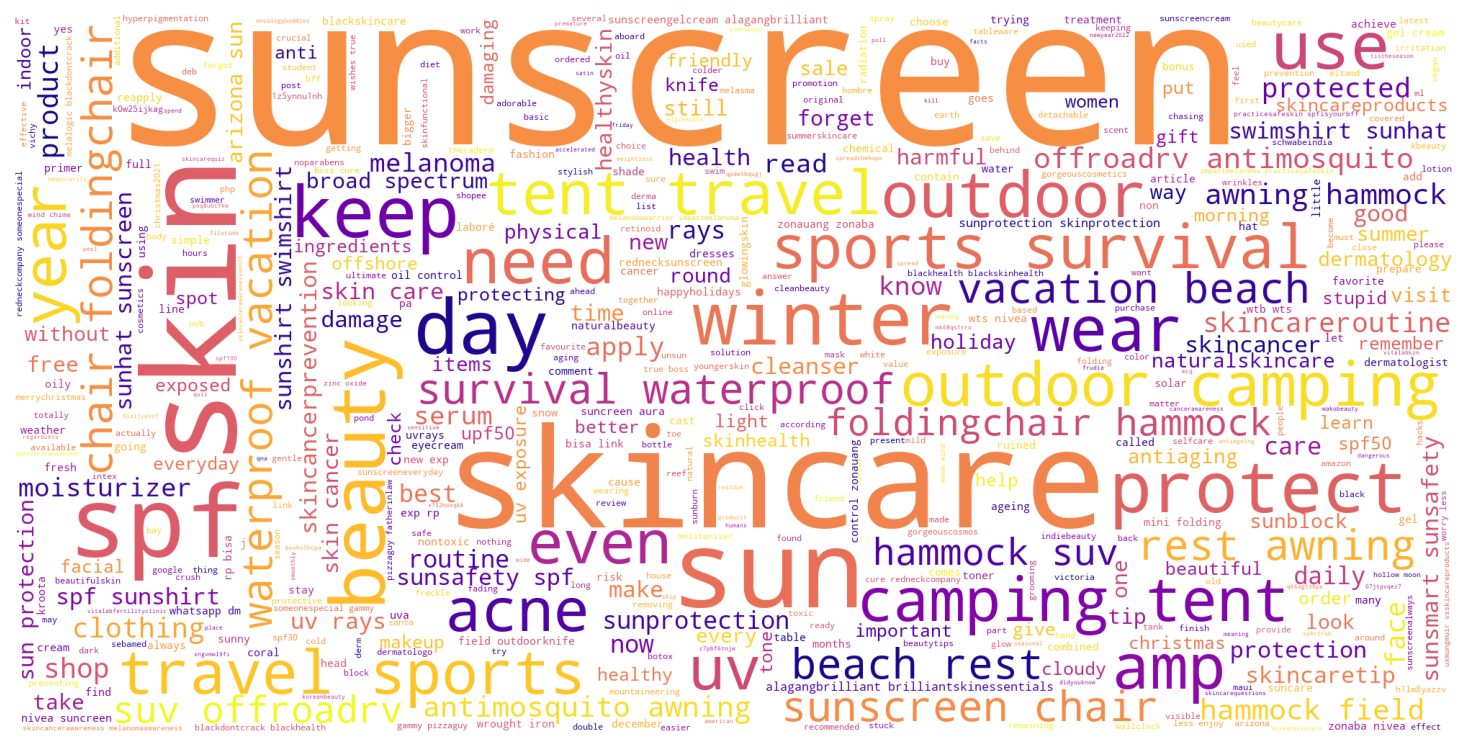

In [26]:
# Generate word cloud
wordcloud = WordCloud(
    stopwords=stopwords,
    width=2000, height=1000,
#   colormap='viridis', # default matplotlib colormap
#   colormap='tab20c',
    colormap='plasma',
#   max_font_size=50, 
    max_words=500, 
    background_color = 'white').generate(all_words)

# Show word cloud   
plt.figure(figsize = (10, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [27]:
# Download image from url
def download_img(url, imgfilename=None):
    r=requests.get(url)
    return io.BytesIO(r.content)

In [28]:
# Read the mask image to generate word cloud from mask image

#mask_img_file='cloud.png'
#mask_img_file='speaker.png'
#mask_img_file='A_mask.png'
#mask_img_file="twitter-icon.png"
# mask = np.array(Image.open(mask_img_file).convert('RGBA'))
#img_url=f'https://github.com/prasertcbs/img/raw/master/mask/{mask_img_file}'
img_url=f'https://i.stack.imgur.com/M2jeo.jpg'
mask = np.array(Image.open(download_img(img_url)).convert('RGBA'))

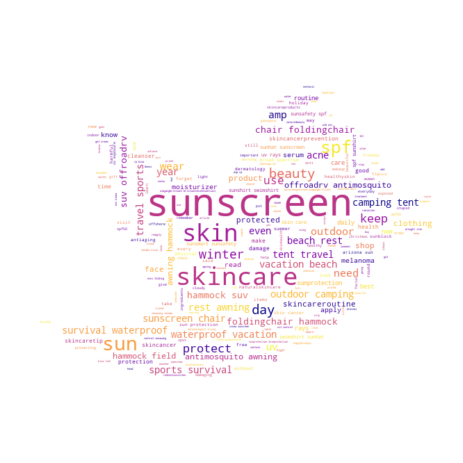

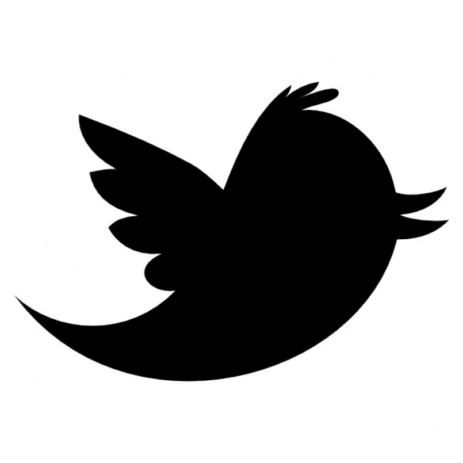

In [35]:
# https://matplotlib.org/3.3.3/tutorials/colors/colormaps.html

# Generate word cloud from mark image
wordcloud = WordCloud(
    stopwords=stopwords,
    width=2000, height=1000,
#   colormap='viridis', # default matplotlib colormap
#   colormap='tab20c',
    colormap='plasma',
#   colormap='inferno',
#   colormap='magma',
#   colormap='cividis',
#   max_font_size=50,
    max_words=5000, 
    mask=mask,
    background_color = 'white').generate(all_words)

# Show word cloud from mark image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
# Show word frequency
wordcloud.words_

{'sunscreen': 1.0,
 'skincare': 0.3130841121495327,
 'skin': 0.27102803738317754,
 'sun': 0.1822429906542056,
 'spf': 0.14953271028037382,
 'day': 0.0794392523364486,
 'beauty': 0.0794392523364486,
 'winter': 0.07476635514018691,
 'protect': 0.07009345794392523,
 'keep': 0.07009345794392523,
 'use': 0.06074766355140187,
 'wear': 0.056074766355140186,
 'amp': 0.056074766355140186,
 'outdoor': 0.056074766355140186,
 'need': 0.056074766355140186,
 'uv': 0.0514018691588785,
 'even': 0.0514018691588785,
 'acne': 0.0514018691588785,
 'year': 0.0514018691588785,
 'outdoor camping': 0.0514018691588785,
 'camping tent': 0.0514018691588785,
 'tent travel': 0.0514018691588785,
 'travel sports': 0.0514018691588785,
 'sports survival': 0.0514018691588785,
 'survival waterproof': 0.0514018691588785,
 'waterproof vacation': 0.0514018691588785,
 'vacation beach': 0.0514018691588785,
 'beach rest': 0.0514018691588785,
 'rest awning': 0.0514018691588785,
 'sunscreen chair': 0.0514018691588785,
 'chair f

In [36]:
# Save word clould image to static\pics folder
wordcloud.to_file("static\pics\wordcloud.png")